## Regresión Lineal Multiple## Regresión Lineal Multiple

**En la regresión lineal múltiple, se utilizan múltiples variables predictoras (independientes) para predecir la variable de respuesta (dependiente). Por ejemplo, además de la cantidad de horas de estudio, también podrías considerar otras variables como la calidad del sueño, la cantidad de ejercicios realizados, etc. El modelo intenta capturar la relación entre todas estas variables predictoras y la variable de respuesta.**

**Importamos librerias**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

**Creamos dataset y mostramos su información**

In [40]:
csv = seaborn.load_dataset('iris')
csv.head(), csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 None)

In [41]:
csv['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Tranformamos nuestra variable dependiente**

In [42]:
transform = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

**Seleccionamos variables dependientes e independientes y separamos datos de prueba-entrenamiento**

In [43]:
x = csv.iloc[:, [0,1]]
y = csv['species'].replace(transform)
x.head(), y.head()

(   sepal_length  sepal_width
 0           5.1          3.5
 1           4.9          3.0
 2           4.7          3.2
 3           4.6          3.1
 4           5.0          3.6,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: species, dtype: int64)

In [44]:
y = y.values.reshape((-1,1))

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

**Entrenamos nuestro modelo y realizamos la predicción**

In [46]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(x_train, y_train)
predict = modelo.predict(x_test)
predict

array([[ 1.01989819],
       [ 0.02151552],
       [-0.12093093],
       [-0.03752516],
       [ 1.05113695],
       [ 1.73869685],
       [ 1.58937673],
       [ 1.00427882],
       [ 1.20045707],
       [ 1.60499611],
       [ 1.30635588],
       [ 1.40881786],
       [ 0.79248119],
       [ 0.70563859],
       [ 1.58937673],
       [ 2.07201266],
       [ 1.72307747],
       [-0.01846895],
       [ 0.04400857],
       [ 0.82715678],
       [ 1.13797955],
       [ 0.45729332],
       [-0.27368787],
       [ 0.15865309],
       [ 1.67965617],
       [ 1.43661978],
       [ 0.27673445],
       [ 0.59973977],
       [-0.14342397],
       [ 2.39501798]])

**Coeficiiente y b=intercept_**

In [47]:
modelo.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['sepal_length', 'sepal_width'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([[ 0.74660057, -0.5904068 ]]),
 'rank_': 2,
 'singular_': array([8.80645087, 4.63763658]),
 'intercept_': array([-1.58258605])}

**Intercepción en el plano**

In [48]:
print('y = {} * sepal_lenght + {} * sepal_width + {}'.format(modelo.coef_[0][0], modelo.coef_[0][1], modelo.intercept_[0]))

y = 0.7466005746203466 * sepal_lenght + -0.5904067961514139 * sepal_width + -1.582586051552441


**Graficamos nuestra predicción en plano 3D**

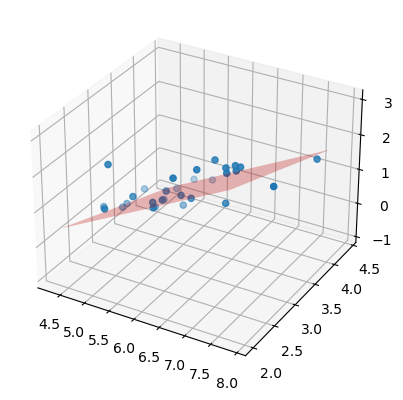

In [50]:
# Genera datos para el plano 3D
x_surf, y_surf = np.meshgrid(np.linspace(x_train.iloc[:, 0].min(), x_train.iloc[:, 0].max(),100),
                             np.linspace(x_train.iloc[:, 1].min(), x_train.iloc[:, 1].max(),100))
plane = modelo.coef_[0][0] * x_surf + modelo.coef_[0][1] * y_surf + modelo.intercept_[0]

# Graficamos los datos de prueba
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_test.iloc[:,0], x_test.iloc[:,1], y_test)
ax.plot_surface(x_surf, y_surf, plane, color='red', alpha=0.3)
plt.show()

**Evaluamos que tan bueno es nuestro modelo**